### Notebook 3 - correlations of node centralities in technology graphs and output p.c. (Pearson correlation) - ALL COUNTRIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

seed = 100

In [2]:
tech1_centr_path = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology1/'
tech2_centr_path = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology2/'

In [3]:
# all computed centrality names
centr_names = []
for filename in os.listdir(tech1_centr_path):
    centr_names.append(filename.replace('.csv', ''))
print(centr_names)

['betweenness_centr_uw', 'pagerank_centr_uw', 'degree_centr', 'pagerank_centr', 'eigenv_centr', 'eigenv_centr_uw', 'closeness_centr', 'betweenness_centr']


In [4]:
oecd_iso = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 
            'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 
            'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA']

In [5]:
centrality_names = {
    'betweenness_centr_uw' : 'Betweenness Centrality - Unweighted',
    'betweenness_centr' : 'Betweenness Centrality - Weighted',
    'pagerank_centr_uw' : 'PageRank Centrality - Unweighted',
    'degree_centr' : 'Degree Centrality - Weighted',
    'pagerank_centr' : 'PageRank Centrality - Weighted',
    'eigenv_centr' : 'Eigenvector Centrality - Weighted',
    'eigenv_centr_uw' : 'Eigenvector Centrality - Unweighted',
    'closeness_centr' : 'Closeness Centrality - Weighted' 
}

In [6]:
def plot_correlations(df, xlabel, title):
    plt.figure(figsize=(25, 10))
    plt.plot(df, 'o-', linewidth=2.5)

    plt.grid()
    plt.legend(list(map(lambda x: centrality_names[x], res1_df.columns)), loc="lower center", ncol=4, 
               fontsize=13)

    ymin = np.min(df.values)
    ymax = np.max(df.values)

    plt.ylim(ymin - 0.2, ymax + 0.1)
    plt.xlim(df.index[0], df.index[-1])

    plt.yticks(np.arange(round(ymin, 1) - 0.1, round(ymax, 1) + 0.1, 0.1))
    plt.xticks(np.arange(df.index[0], df.index[-1] + 1, 1))
    
    plt.title(title, fontsize=25)
    plt.ylabel('Correlation coefficient', fontsize=13)
    plt.xlabel(xlabel, fontsize=13)

    plt.show()

In [7]:
def add_pvlaue_level(coef, pvalue):
    if pvalue <= 0.1 and pvalue > 0.05:
        asterisks = '*'
    elif pvalue <= 0.05 and pvalue > 0.01:
        asterisks = '**'
    elif pvalue <= 0.01:
        asterisks = '***'
    else:
        asterisks = ''
    return (str(coef) + '$^{' + asterisks + '}$')

In [8]:
# GDP p.c. data from PWT10
pwt = pd.read_csv('data/pwt10.csv')[['countrycode', 'year', 'rgdpo', 'pop']]
pwt['gdppc'] = pwt['rgdpo'] / pwt['pop']
pwt.drop(columns=['rgdpo', 'pop'], inplace=True)
pwt = pwt.pivot(index='year', columns='countrycode', values='gdppc')
pwt.sort_values(by='year', inplace=True)
pwt = pwt[oecd_iso]

# GDP p.c. growth rate (annual increment)
pwt_pct1 = pwt.pct_change(periods=1)

# GDP p.c. growth rate (10y increment)
pwt_pct10 = pwt.pct_change(periods=10)

# GDP p.c. growth rate (20y increment)
pwt_pct20 = pwt.pct_change(periods=20)

# GDP p.c. growth rate (30y increment)
pwt_pct30 = pwt.pct_change(periods=30)

# GDP p.c. growth rate (40y increment)
pwt_pct40 = pwt.pct_change(periods=40)

# GDP p.c. growth rate (50y increment)
pwt_pct50 = pwt.pct_change(periods=50)

In [9]:
# check how many countries do we have in different dimension pairs

### technology 1 & GDPpc
gdp_set = set(pwt.columns)
tech1_centr = pd.read_csv(f'{tech1_centr_path}{centr_names[3]}.csv', index_col=0).fillna(method='ffill')
tech1_set = set(tech1_centr.columns)
print(f'countries in GDPpc dataframe: {len(gdp_set)}')
print(f'countries in tech.1 centr. dataframe: {len(tech1_set)}')
print(f'intersection in GDPpc and tech.1: {len(gdp_set.intersection(tech1_set))}')
print(f'intersection rate: {len(gdp_set.intersection(tech1_set)) / min(len(gdp_set), len(tech1_set))}')
print(' ')
### technology 2 & GDPpc
tech2_centr = pd.read_csv(f'{tech2_centr_path}{centr_names[3]}.csv', index_col=0).fillna(method='ffill')
tech2_set = set(tech2_centr.columns)
print(f'countries in GDPpc dataframe: {len(gdp_set)}')
print(f'countries in tech.2 centr. dataframe: {len(tech2_set)}')
print(f'intersection in GDPpc and tech.2: {len(gdp_set.intersection(tech2_set))}')
print(f'intersection rate: {len(gdp_set.intersection(tech2_set)) / min(len(gdp_set), len(tech2_set))}')

countries in GDPpc dataframe: 34
countries in tech.1 centr. dataframe: 160
intersection in GDPpc and tech.1: 34
intersection rate: 1.0
 
countries in GDPpc dataframe: 34
countries in tech.2 centr. dataframe: 160
intersection in GDPpc and tech.2: 34
intersection rate: 1.0


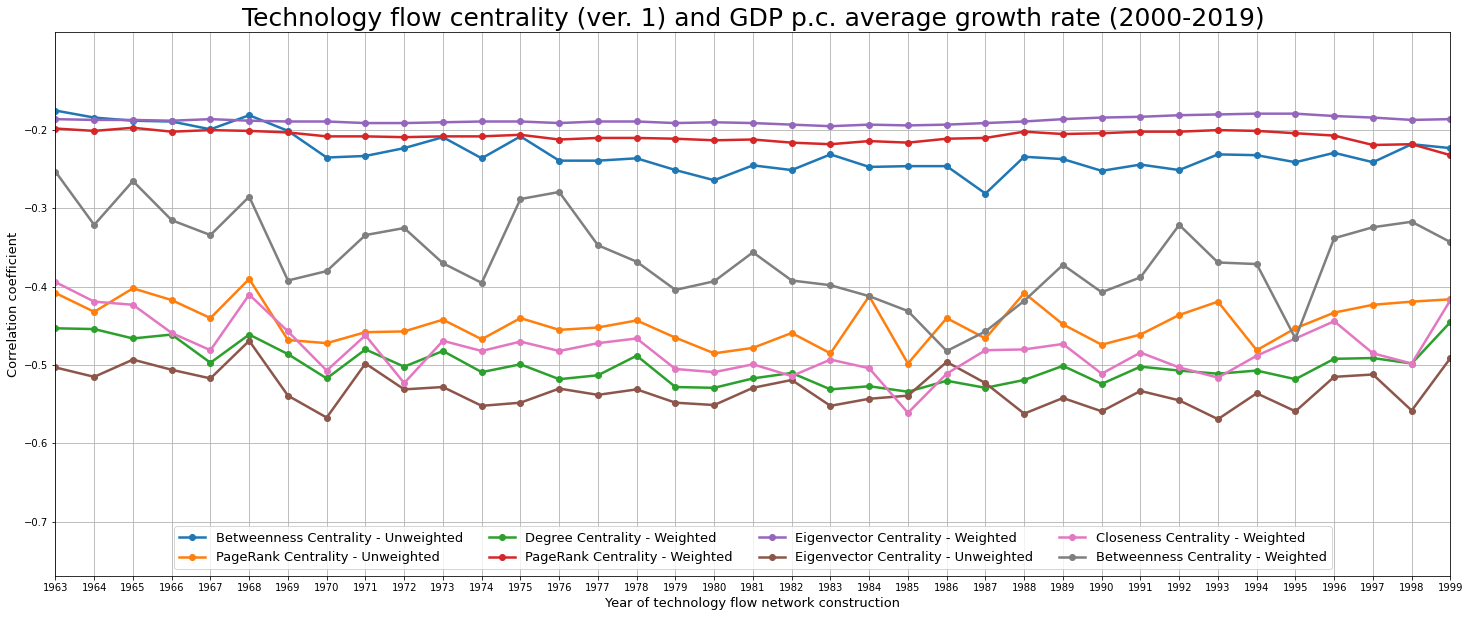

In [10]:
# iterative correlation computation
# technology 1 & GDPpc 
# technology 1: 1963 - 1999
# GDPpc: average annual growth rate 2000 - 2019

tech_path = tech1_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech1_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1963, 2000, 1):    
        tech_array = tech_centr_df[tech_gdp_interc].loc[tech_year]
        gdp_array = pwt_pct1[tech_gdp_interc].loc[2000:2019].mean()
        corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1963, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality (ver. 1) and GDP p.c. average growth rate (2000-2019)')

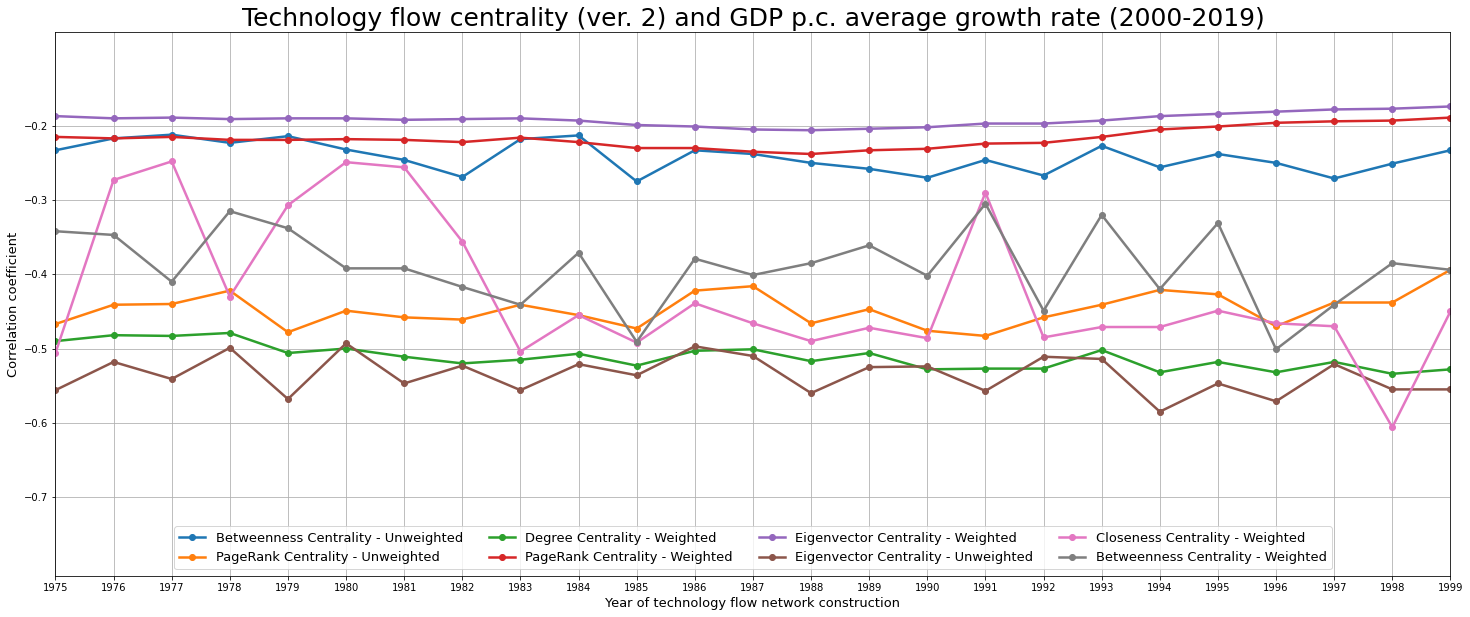

In [11]:
# iterative correlation computation
# technology 2 & GDPpc 
# technology 2: 1963 - 1999
# GDPpc: average annual growth rate 2000 - 2019

tech_path = tech2_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech2_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1975, 2000, 1):    
        tech_array = tech_centr_df[tech_gdp_interc].loc[tech_year]
        gdp_array = pwt_pct1[tech_gdp_interc].loc[2000:2019].mean()
        corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1975, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality (ver. 2) and GDP p.c. average growth rate (2000-2019)')

In [12]:
# technology 1 & GDPpc 
# technology 1: average centrality (1963 - 1969)
# GDPpc: GDP pc growth 1969 - 2019 (50y)

tech_path = tech1_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech1_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct50[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1963:1969].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.11$^{}$
pagerank_centr_uw : -0.182$^{}$
degree_centr : -0.257$^{}$
pagerank_centr : -0.106$^{}$
eigenv_centr : -0.102$^{}$
eigenv_centr_uw : -0.175$^{}$
closeness_centr : -0.173$^{}$
betweenness_centr : -0.155$^{}$


In [13]:
# technology 1 & GDPpc 
# technology 1: average centrality (1969 - 1979)
# GDPpc: GDP pc growth 1979 - 2019 (40y)

tech_path = tech1_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech1_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct40[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1969:1979].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.163$^{}$
pagerank_centr_uw : -0.276$^{}$
degree_centr : -0.351$^{*}$
pagerank_centr : -0.142$^{}$
eigenv_centr : -0.133$^{}$
eigenv_centr_uw : -0.291$^{}$
closeness_centr : -0.294$^{}$
betweenness_centr : -0.254$^{}$


In [14]:
# technology 1 & GDPpc 
# technology 1: average centrality (1979 - 1989)
# GDPpc: GDP pc growth 1989 - 2019 (30y)

tech_path = tech1_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech1_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct30[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1979:1989].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.197$^{}$
pagerank_centr_uw : -0.319$^{*}$
degree_centr : -0.377$^{**}$
pagerank_centr : -0.166$^{}$
eigenv_centr : -0.154$^{}$
eigenv_centr_uw : -0.337$^{*}$
closeness_centr : -0.343$^{*}$
betweenness_centr : -0.329$^{*}$


In [15]:
# technology 2 & GDPpc 
# technology 2: average centrality (1979 - 1989)
# GDPpc: GDP pc growth 1989 - 2019 (30y)

tech_path = tech2_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech2_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct30[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1979:1989].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.193$^{}$
pagerank_centr_uw : -0.337$^{*}$
degree_centr : -0.39$^{**}$
pagerank_centr : -0.177$^{}$
eigenv_centr : -0.159$^{}$
eigenv_centr_uw : -0.388$^{**}$
closeness_centr : -0.287$^{}$
betweenness_centr : -0.333$^{*}$


In [16]:
# technology 1 & GDPpc 
# technology 1: average centrality (1989 - 1999)
# GDPpc: GDP pc growth 1999 - 2019 (20y)

tech_path = tech1_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech1_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct20[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1989:1999].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.204$^{}$
pagerank_centr_uw : -0.404$^{**}$
degree_centr : -0.461$^{***}$
pagerank_centr : -0.178$^{}$
eigenv_centr : -0.157$^{}$
eigenv_centr_uw : -0.514$^{***}$
closeness_centr : -0.466$^{***}$
betweenness_centr : -0.341$^{**}$


In [17]:
# technology 2 & GDPpc 
# technology 2: average centrality (1989 - 1999)
# GDPpc: GDP pc growth 1999 - 2019 (20y)

tech_path = tech2_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech2_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct20[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1989:1999].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.218$^{}$
pagerank_centr_uw : -0.407$^{**}$
degree_centr : -0.483$^{***}$
pagerank_centr : -0.179$^{}$
eigenv_centr : -0.162$^{}$
eigenv_centr_uw : -0.52$^{***}$
closeness_centr : -0.466$^{***}$
betweenness_centr : -0.382$^{**}$


In [18]:
# technology 1 & GDPpc 
# technology 1: average centrality (1989 - 1999)
# GDPpc: GDP pc growth 2009 - 2019 (10y)

tech_path = tech1_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech1_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct10[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1989:1999].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.089$^{}$
pagerank_centr_uw : -0.233$^{}$
degree_centr : -0.278$^{}$
pagerank_centr : -0.073$^{}$
eigenv_centr : -0.057$^{}$
eigenv_centr_uw : -0.332$^{*}$
closeness_centr : -0.315$^{*}$
betweenness_centr : -0.186$^{}$


In [19]:
# technology 2 & GDPpc 
# technology 2: average centrality (1989 - 1999)
# GDPpc: GDP pc growth 2009 - 2019 (10y)

tech_path = tech2_centr_path # <--- variable
tech_gdp_interc = list(gdp_set.intersection(tech2_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    gdp_array = pwt_pct10[tech_gdp_interc].iloc[-1].dropna()
    tech_array = tech_centr_df[gdp_array.index].loc[1989:1999].mean()
    corr, pvalue = pearsonr(x=tech_array, y=gdp_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : -0.095$^{}$
pagerank_centr_uw : -0.23$^{}$
degree_centr : -0.286$^{}$
pagerank_centr : -0.072$^{}$
eigenv_centr : -0.06$^{}$
eigenv_centr_uw : -0.323$^{*}$
closeness_centr : -0.266$^{}$
betweenness_centr : -0.212$^{}$
